## 🔹 Parte 1: Escolha um Dataset

### ✨ Instruções:
1. Escolha um dataset de **regressão** ou **classificação** do `sklearn.datasets` ou do Kaggle.
2. Divida os dados em **treino e teste (80/20)**.
3. **Normalize os dados** para garantir um treinamento justo.

---


In [6]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
# 📌 Carregar um dataset para comparação
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Escolhendo o dataset de preços de imóveis (regressão)
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target  # Variável alvo

# Separação treino/teste
X = df.drop(columns=["PRICE"]).values
y = df["PRICE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (16512, 8)
Tamanho do conjunto de teste: (4128, 8)


## 🔹 Parte 2: Treinar os Modelos

### ✨ Instruções:
1. **Treine os modelos tradicionais**: KNN, Árvore de Decisão, Random Forest, Gradient Boosting e XGBoost.
2. **Treine uma Rede Neural** para comparar os resultados.
3. **Compare as métricas** e veja qual modelo se sai melhor.

---


In [8]:
# 📌 Importando os modelos tradicionais
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras

# Criando modelos
modelos = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Árvore de Decisão": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "XGBoost": XGBRegressor(n_estimators=100, objective="reg:squarederror"),
}

# Treinando e avaliando os modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[nome] = {"MSE": mse, "MAE": mae, "R²": r2}

# Exibindo os resultados em um DataFrame
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)


                        MSE       MAE        R²
KNN                0.432422  0.446154  0.670010
Árvore de Decisão  0.524515  0.522259  0.599732
Random Forest      0.254951  0.327901  0.805442
Gradient Boosting  0.293936  0.371636  0.775691
XGBoost            0.222590  0.309573  0.830137


## 🔹 Parte 3: Treinar a Rede Neural

### ✨ Instruções:
1. **Crie uma rede neural simples** usando TensorFlow/Keras.
2. **Compare os resultados com os modelos anteriores**.

---


In [9]:
# 📌 Criando a Rede Neural
modelo_rna = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Saída única para regressão
])

modelo_rna.compile(optimizer="adam", loss="mse", metrics=["mae"])
historico_rna = modelo_rna.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Avaliação da Rede Neural
mse_rna, mae_rna = modelo_rna.evaluate(X_test, y_test)
r2_rna = r2_score(y_test, modelo_rna.predict(X_test))

# Adicionando os resultados da RNA na tabela
df_resultados.loc["Rede Neural"] = {"MSE": mse_rna, "MAE": mae_rna, "R²": r2_rna}
print(df_resultados)


/Users/ralph/.pyenv/versions/3.9.19/envs/IA/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.2571 - mae: 0.3419
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step
                        MSE       MAE        R²
KNN                0.432422  0.446154  0.670010
Árvore de Decisão  0.524515  0.522259  0.599732
Random Forest      0.254951  0.327901  0.805442
Gradient Boosting  0.293936  0.371636  0.775691
XGBoost            0.222590  0.309573  0.830137
Rede Neural        0.258089  0.339552  0.803047


## 🔹 Parte 4: Analisando os Resultados

### ✨ Instruções:
1. Compare os valores de **MSE, MAE e R²** entre os modelos.
2. **Perguntas para reflexão**:
   - Qual modelo teve **melhor desempenho**? Por quê?
   - O que acontece se **ajustarmos hiperparâmetros** nos modelos tradicionais?
   - A Rede Neural superou os outros modelos? Se não, o que pode ser ajustado?

---


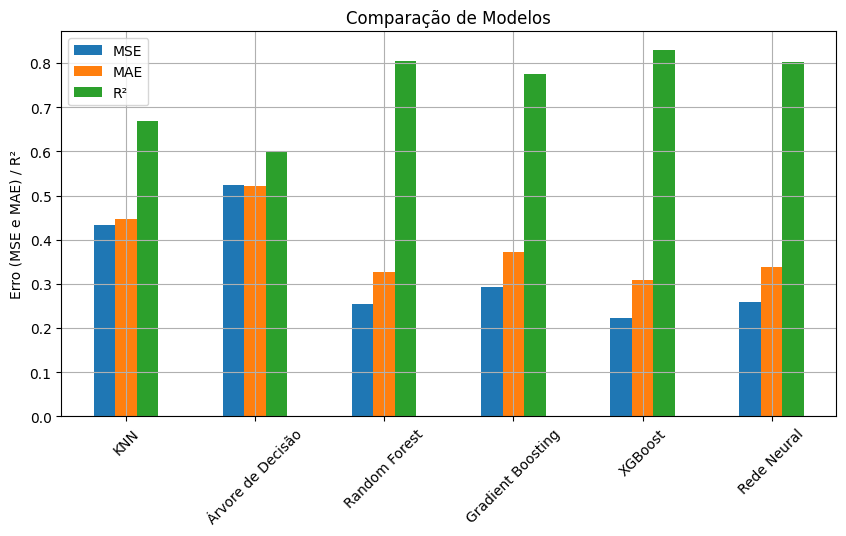

In [10]:
# 📌 Visualização dos Resultados
import matplotlib.pyplot as plt

df_resultados.plot(kind="bar", figsize=(10, 5), title="Comparação de Modelos")
plt.ylabel("Erro (MSE e MAE) / R²")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## 📌 Conclusão da Atividade

✅ Comparar **Redes Neurais com modelos tradicionais**.  
✅ Medir o desempenho de modelos usando **MSE, MAE e R²**.  
✅ Experimentar **hiperparâmetros para melhorar modelos**.  
✅ Avaliar em que situações **Redes Neurais são melhores que outros algoritmos**.  
